# Predictive Maintenance

### Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn .model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report, roc_auc_score,accuracy_score

In [2]:
df = pd.read_csv("predictive_maintenance.csv")
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [3]:
df.drop(columns= ['UDI','Product ID','Type'], inplace= True)
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,298.1,308.6,1551,42.8,0,0,No Failure
1,298.2,308.7,1408,46.3,3,0,No Failure
2,298.1,308.5,1498,49.4,5,0,No Failure
3,298.2,308.6,1433,39.5,7,0,No Failure
4,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,No Failure
9996,298.9,308.4,1632,31.8,17,0,No Failure
9997,299.0,308.6,1645,33.4,22,0,No Failure
9998,299.0,308.7,1408,48.5,25,0,No Failure


In [4]:
df['Target'].value_counts(normalize= True)

Target
0    0.9661
1    0.0339
Name: proportion, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      10000 non-null  float64
 1   Process temperature [K]  10000 non-null  float64
 2   Rotational speed [rpm]   10000 non-null  int64  
 3   Torque [Nm]              10000 non-null  float64
 4   Tool wear [min]          10000 non-null  int64  
 5   Target                   10000 non-null  int64  
 6   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB


In [6]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [7]:
df.isnull().sum()

Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
features = []
for cols in df:
    features.append(cols)
features = features[:5]
features

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]']

### Univariate Analysis

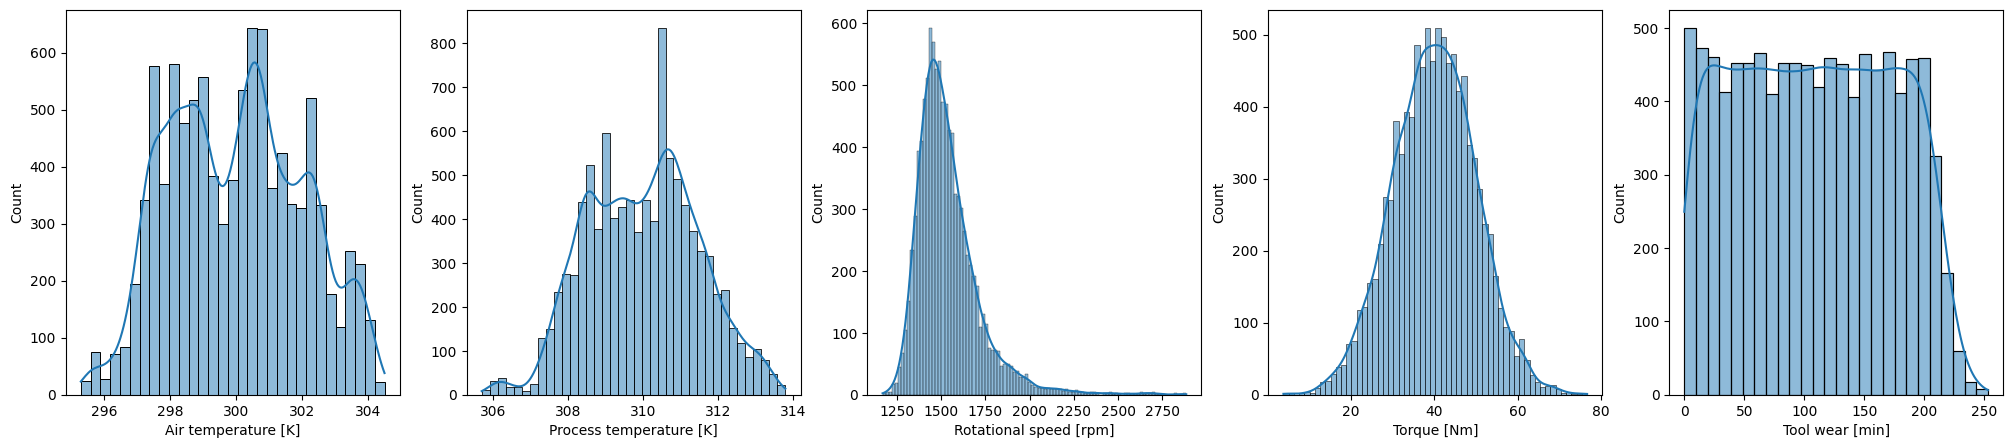

In [10]:
plt.figure(figsize= (25,5))
for i in range(len(features)):
    plt.subplot(1,len(features),i+1)
    sns.histplot(df[features[i]], kde=True)
plt.show()

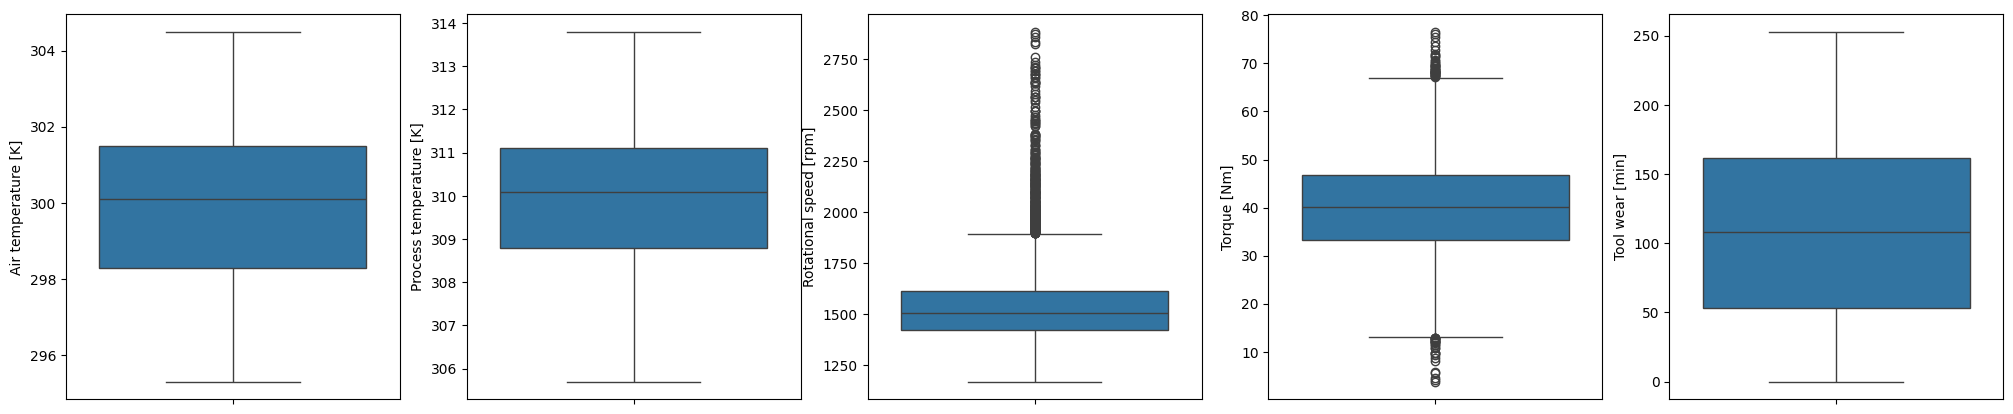

In [11]:
plt.figure(figsize = (25,5))
for i in range(len(features)):
    plt.subplot(1,len(features),i+1)
    sns.boxplot(df[features[i]])
plt.show()


In [12]:
skew =[df[cols].skew() for cols in features]
skew

[np.float64(0.11427392052155042),
 np.float64(0.015027267769228572),
 np.float64(1.9931710047137523),
 np.float64(-0.00951659584005855),
 np.float64(0.027292239050452527)]

### Outliers


In [13]:
q1 = df['Rotational speed [rpm]'].quantile(0.25)
q3 = df['Rotational speed [rpm]'].quantile(0.75)
iqr = q3-q1
max_rpm = q3 + 1.5*iqr
max_rpm

np.float64(1895.5)

In [14]:
(df['Rotational speed [rpm]'] > max_rpm).sum()/df['Rotational speed [rpm]'].count()

np.float64(0.0418)

In [15]:
df = df[df['Rotational speed [rpm]'] <= max_rpm]

In [16]:
iq1,iq3 = df['Torque [Nm]'].quantile(0.25),df['Torque [Nm]'].quantile(0.75)
iqr = iq3 - iq1
max_torque = iq3 + 1.5*iqr
max_torque


np.float64(66.45)

In [17]:
(df['Torque [Nm]'] > max_torque).sum()/df['Torque [Nm]'].count()

np.float64(0.004905030265080359)

In [18]:
df = df[df['Torque [Nm]'] <= max_torque]

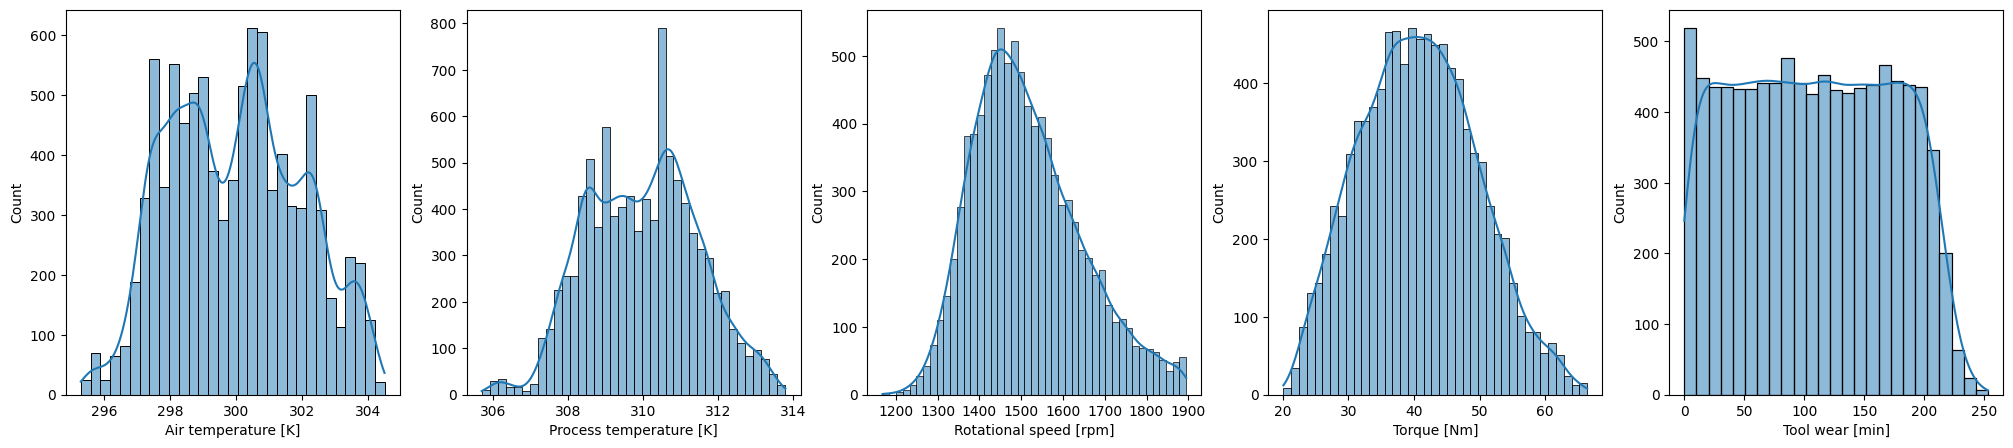

In [19]:
plt.figure(figsize= (25,5))
for i in range(len(features)):
    plt.subplot(1,len(features),i+1)
    sns.histplot(df[features[i]], kde=True)
plt.show()

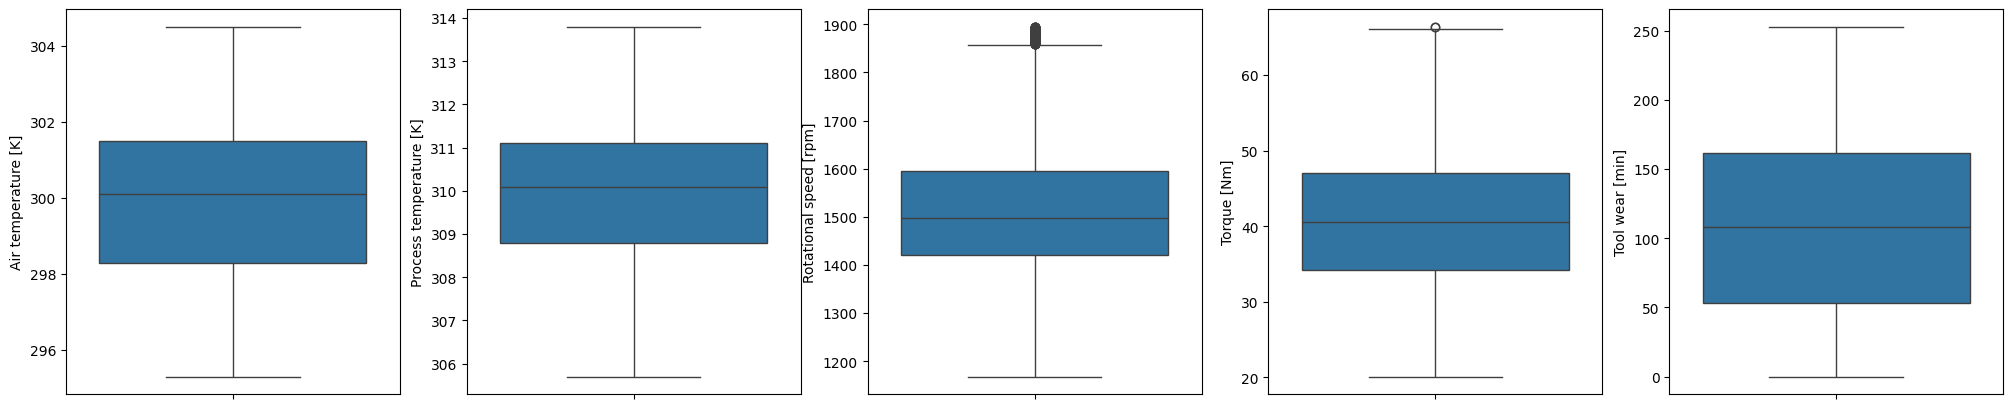

In [20]:
plt.figure(figsize = (25,5))
for i in range(len(features)):
    plt.subplot(1,len(features),i+1)
    sns.boxplot(df[features[i]])
plt.show()


### Multivariate Analysis

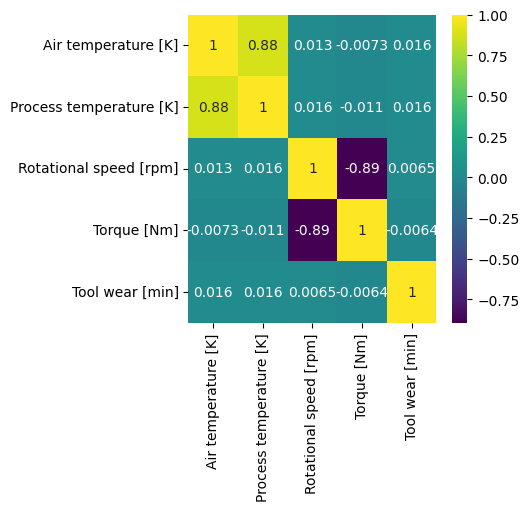

In [21]:
plt.figure(figsize=(4,4))
corr = df[features].corr()
sns.heatmap(corr, annot= True,cmap= 'viridis')
plt.show()

In [22]:
pd.crosstab(df['Failure Type'], df['Target'])

Target,0,1
Failure Type,,
Heat Dissipation Failure,0,110
No Failure,9254,9
Overstrain Failure,0,76
Power Failure,0,27
Random Failures,18,0
Tool Wear Failure,0,41


In [23]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9263
Heat Dissipation Failure     110
Overstrain Failure            76
Tool Wear Failure             41
Power Failure                 27
Random Failures               18
Name: count, dtype: int64

In [24]:
df[df['Target'] == 1]['Failure Type'].value_counts()

Failure Type
Heat Dissipation Failure    110
Overstrain Failure           76
Tool Wear Failure            41
Power Failure                27
No Failure                    9
Name: count, dtype: int64

In [25]:
df.drop(index= df[df['Failure Type'] == 'Random Failures'].index, inplace= True)

Target


[]

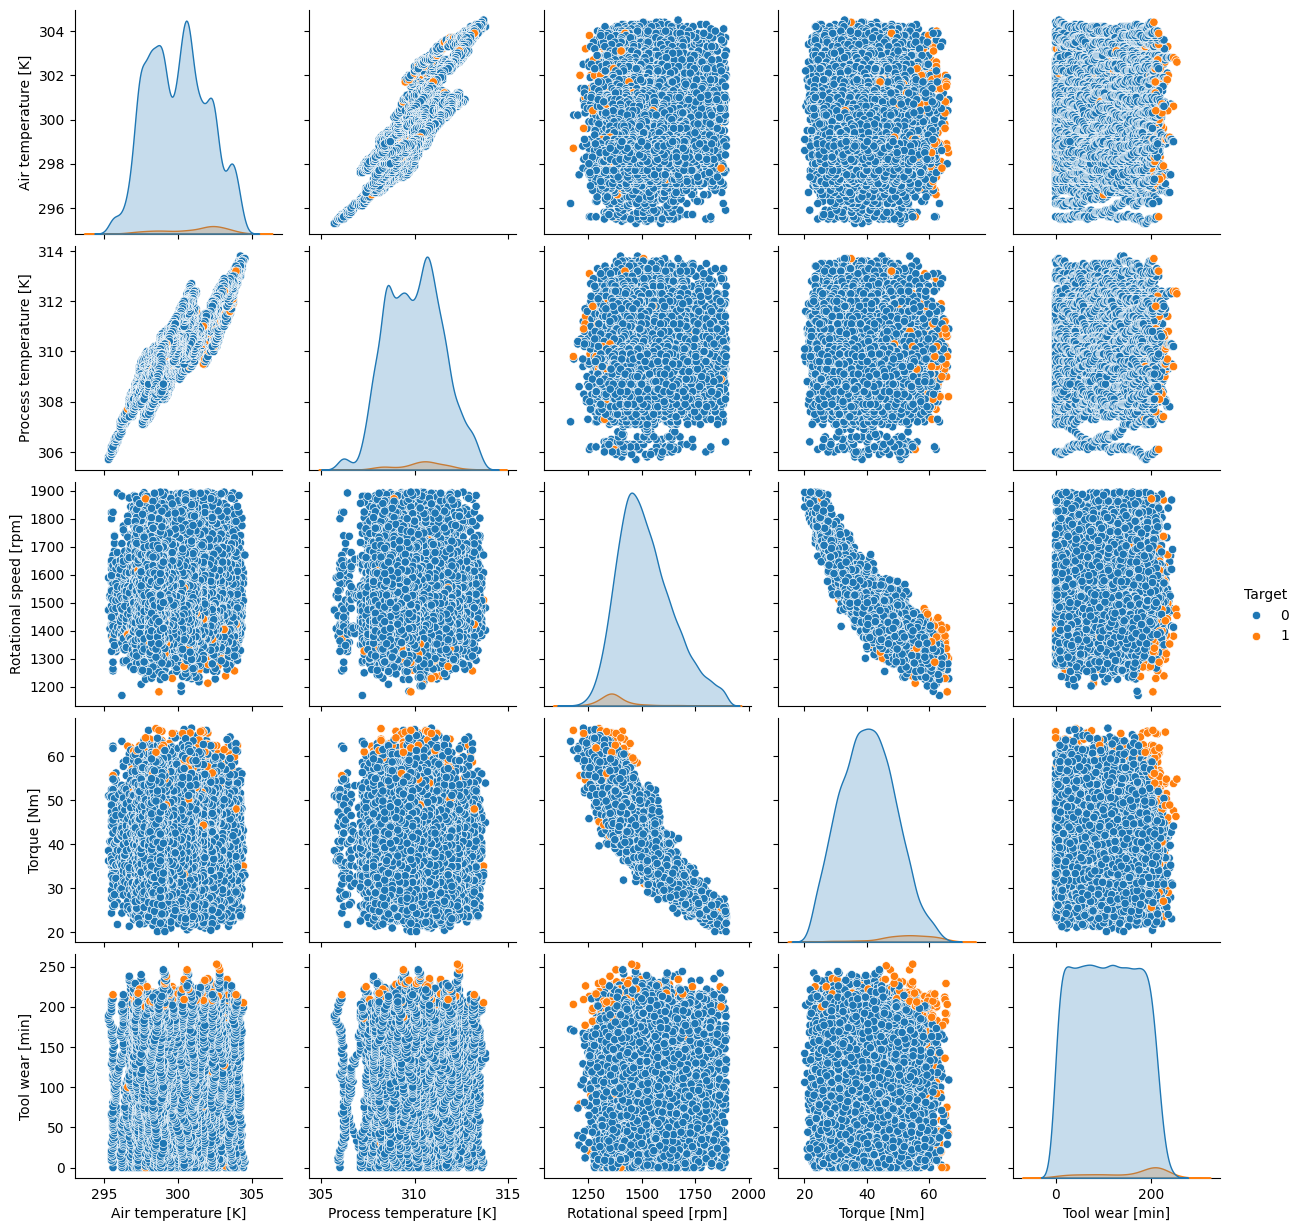

In [26]:
sns.pairplot(df.drop(columns= 'Failure Type'), hue = 'Target')
print('Target')
plt.plot()

In [27]:
df['Failure Type'] = np.where(df['Target'] == 0, 'No Failure', np.where(df['Failure Type'] == 'No Failure','Random Failures',df['Failure Type']))
df.rename(columns= {'No Failure':'Unknown Failures'}, inplace= True)

Target == 1


[]

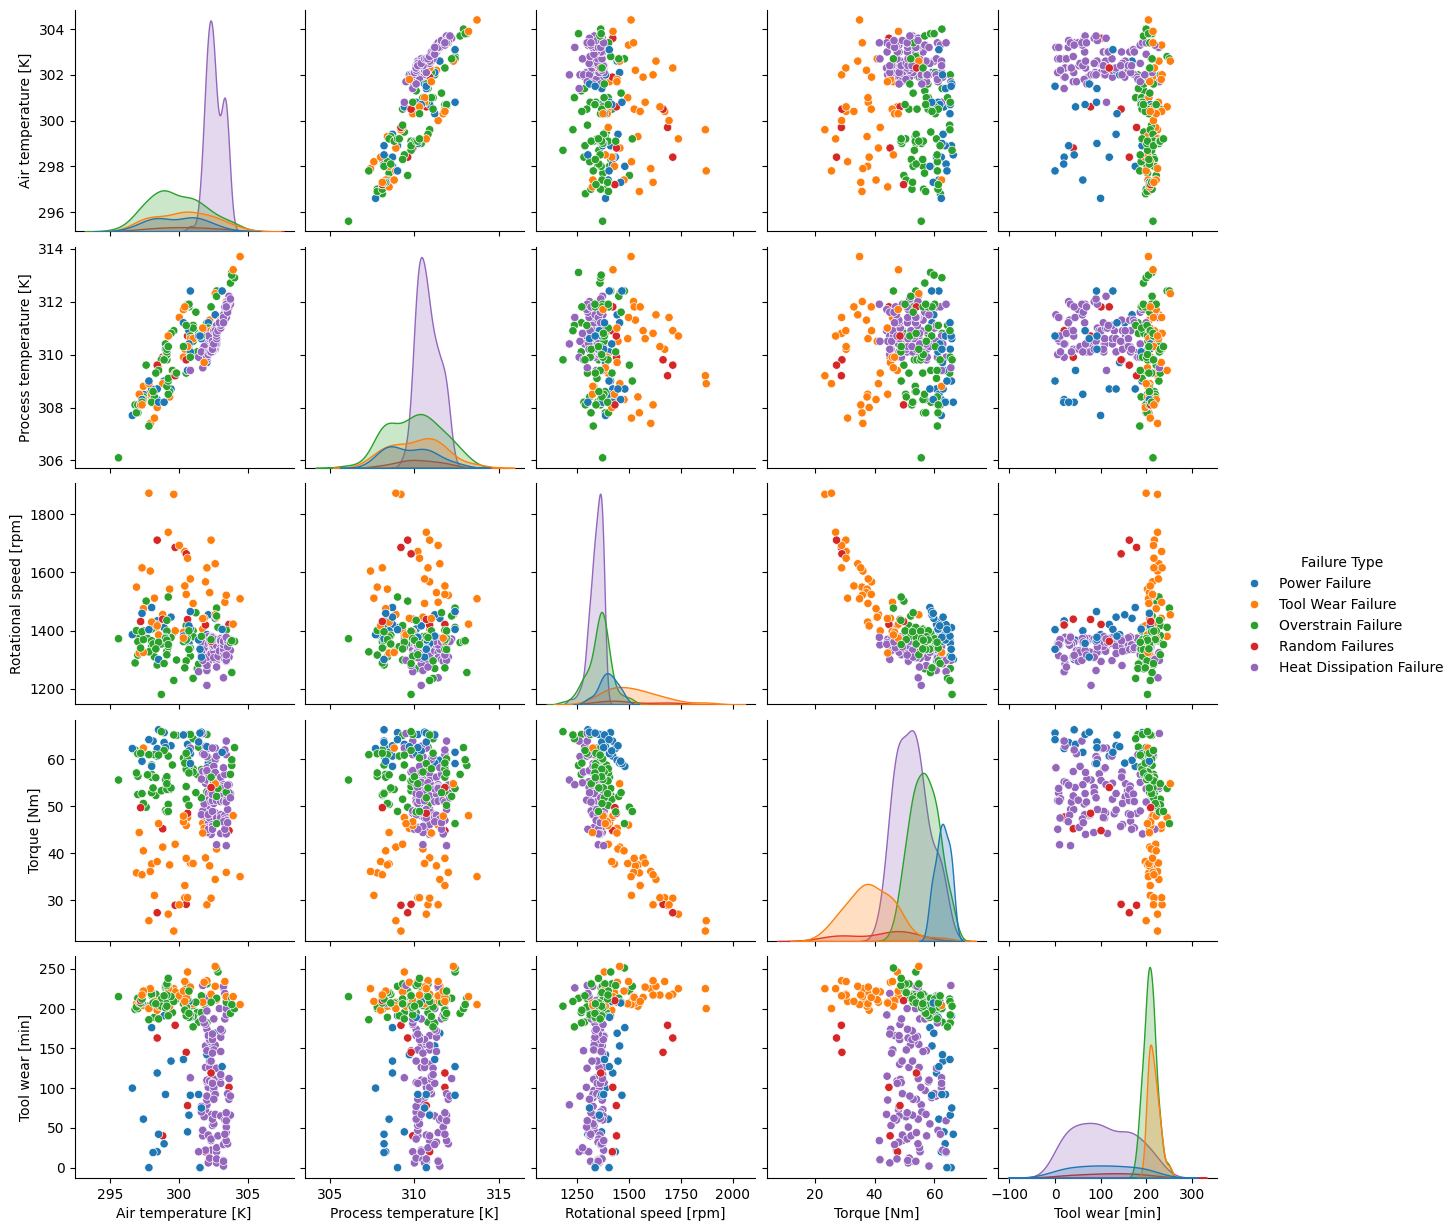

In [28]:
sns.pairplot(df[df['Target'] == 1].drop(columns= 'Target'), hue = 'Failure Type')
print('Target == 1')
plt.plot()

In [29]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9254
Heat Dissipation Failure     110
Overstrain Failure            76
Tool Wear Failure             41
Power Failure                 27
Random Failures                9
Name: count, dtype: int64

In [30]:
df['Target'].value_counts()

Target
0    9254
1     263
Name: count, dtype: int64

### Target - Binary Classification
#### Train Test split

In [31]:
failure_types = ['Overstrain Failure','Power Failure', 'Tool Wear Failure','No Failure','Random Failures']

X = df[features]
y_bin = df['Target']

smote = SMOTE(random_state= 1)
X_resampled, y_bin_resampled = smote.fit_resample(X, y_bin)

X_train, X_test, y_bin_train, y_bin_test = train_test_split(X_resampled,y_bin_resampled,test_size= 0.2, random_state= 1)
X_train.shape,X_test.shape


((14806, 5), (3702, 5))

#### Scaling

In [32]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

X_train_scaled
X_test_scaled

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,1.019518,0.575110,-0.629245,1.091532,-0.544198
1,-0.823506,-1.502191,-0.890029,0.140437,-1.262225
2,0.095830,-0.663268,0.989147,-0.779520,-0.389329
3,0.465279,0.331603,0.874095,-0.741275,1.173436
4,-1.589620,-1.730988,1.188569,-1.254025,0.652514
...,...,...,...,...,...
3697,0.821022,0.304827,-0.859349,0.437766,-0.924330
3698,0.044756,-0.510737,0.958466,-0.731102,-0.079592
3699,-1.283174,-1.044597,2.599869,-1.854418,0.891857
3700,-0.887831,-1.366948,-1.166153,1.904614,-1.262225


In [33]:
features

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]']

#### Predicting Target


In [34]:
model = RandomForestClassifier(class_weight= 'balanced')
model.fit(X_train_scaled, y_bin_train)

y_bin_pred = model.predict(X_test_scaled)
print(y_bin_pred)

[1 0 0 ... 0 1 1]


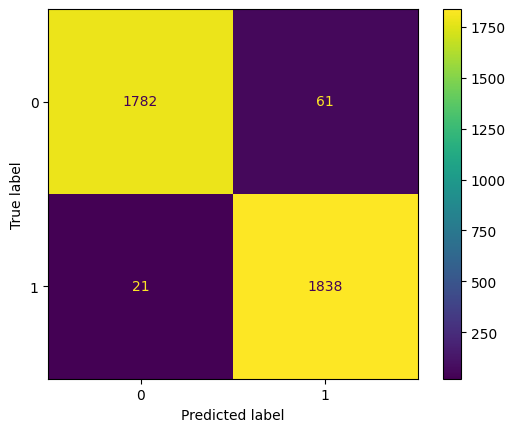

In [35]:
cm = confusion_matrix(y_bin_test, y_bin_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [36]:
print(classification_report(y_bin_test, y_bin_pred))
print(roc_auc_score(y_bin_test, y_bin_pred))
print(accuracy_score(y_bin_test, y_bin_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1843
           1       0.97      0.99      0.98      1859

    accuracy                           0.98      3702
   macro avg       0.98      0.98      0.98      3702
weighted avg       0.98      0.98      0.98      3702

0.9778026973235455
0.97784981091302


### Failure Type - Multi-class classification
#### Train-Test Split

In [37]:
X = df[df['Target'] == 1][features]
y_mult = df[df['Target'] == 1]['Failure Type']

smote = SMOTE(random_state=1)
X_resampled, y_mult_resampled = smote.fit_resample(X, y_mult)

X_mult_train, X_mult_test, y_mult_train, y_mult_test = train_test_split(X_resampled, y_mult_resampled, test_size=0.2, random_state=1)

c:\Users\aadit\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\aadit\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\aadit\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\aadit\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1038

#### Scaling

In [38]:
scaler = StandardScaler()

scaler.fit(X_mult_train)

X_mult_train_scaled = scaler.transform(X_mult_train)
X_mult_test_scaled = scaler.transform(X_mult_test)

X_mult_train_scaled = pd.DataFrame(X_mult_train_scaled)
X_mult_test_scaled = pd.DataFrame(X_mult_test_scaled)

#### Random Forest

In [39]:
model = RandomForestClassifier()
model.fit(X_mult_train_scaled, y_mult_train)

y_mult_pred = model.predict(X_mult_test_scaled)

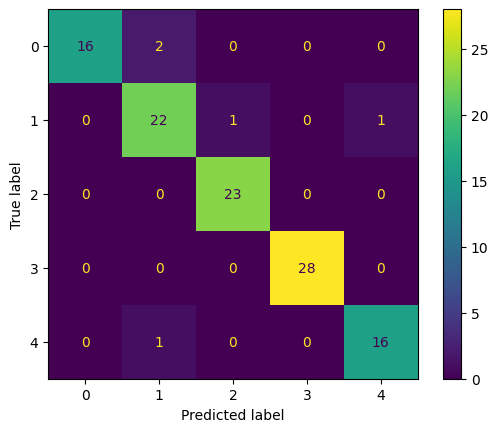

In [40]:
cm = confusion_matrix(y_mult_test, y_mult_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [41]:
print(classification_report(y_mult_test, y_mult_pred))
print(accuracy_score(y_mult_test, y_mult_pred))

                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      0.89      0.94        18
      Overstrain Failure       0.88      0.92      0.90        24
           Power Failure       0.96      1.00      0.98        23
         Random Failures       1.00      1.00      1.00        28
       Tool Wear Failure       0.94      0.94      0.94        17

                accuracy                           0.95       110
               macro avg       0.96      0.95      0.95       110
            weighted avg       0.96      0.95      0.95       110

0.9545454545454546


In [42]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_mult_test_bin = lb.fit_transform(y_mult_test)
y_mult_pred_bin = lb.transform(y_mult_pred)
print(roc_auc_score(y_mult_test_bin, y_mult_pred_bin, multi_class='ovr'))

0.9689601364167952
